### Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer


### Importing the Data

In [2]:
#importing the training set
file = 'data/train.csv'
dataset = pd.read_csv(file, decimal=",")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


### Nature of Data

In [3]:
#understand the nature of the data
dataset.describe()

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [4]:
#understand the nature of the data
dataset.shape

(891, 12)

In [5]:
#understand the nature of the data
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#understand the nature of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(5), object(7)
memory usage: 83.7+ KB


In [7]:
#understand the nature of the data
dataset["Age"] = pd.to_numeric(dataset["Age"])
dataset["Fare"] = pd.to_numeric(dataset["Fare"])

### Histograms and Heat map

In [8]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# look at numeric and categorical values separately 
df_num = dataset[['Age','SibSp','Parch','Fare']]
df_cat = dataset[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

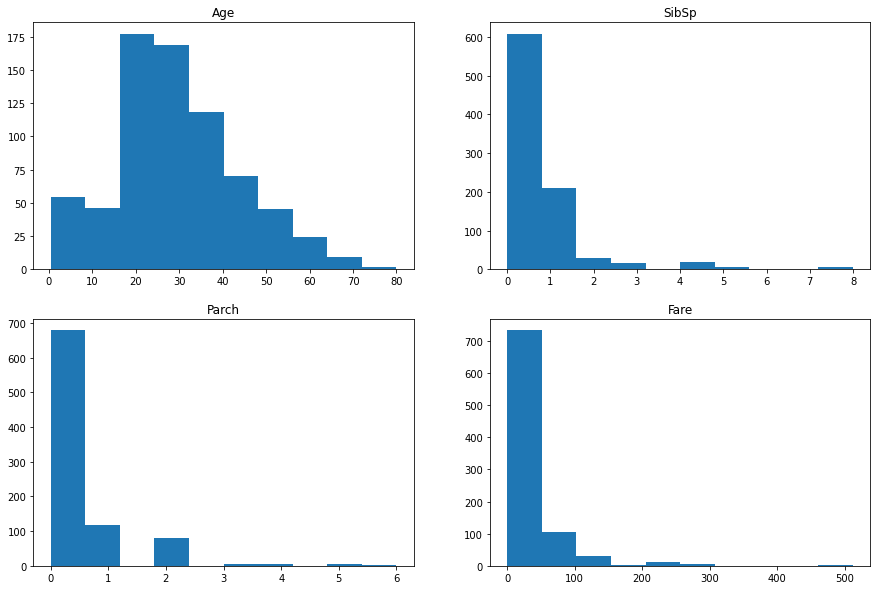

In [10]:
#distributions for all numeric variables

fig = plt.figure(figsize=(15,10))
for count, value in enumerate(list(df_num.columns)):
    fig.add_subplot(2,2,count+1).hist(df_num[value])
    plt.title(value)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


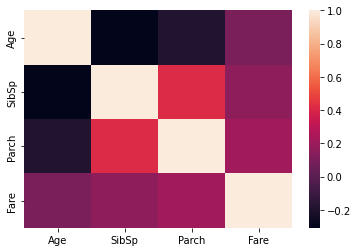

In [11]:
#Heatmap Correlation
print(df_num.corr())
sns.heatmap(df_num.corr());

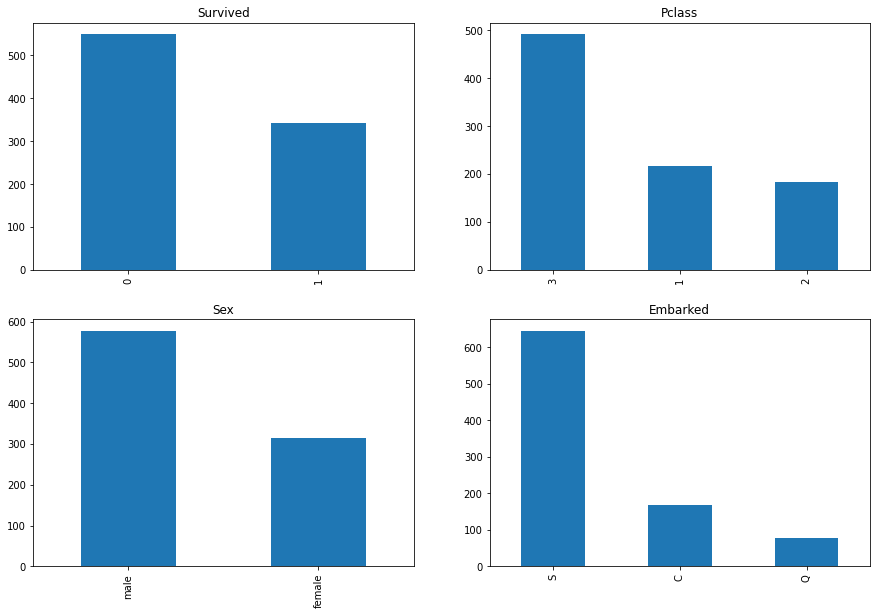

In [13]:
#distributions for categorical variables except for Cabin and Ticket

cat_list = ['Survived', 'Pclass', 'Sex', 'Embarked']
fig = plt.figure(figsize=(15,10))
for count, value in enumerate(cat_list):
    fig.add_subplot(2,2,1+count)
    df_cat[value].value_counts().plot(kind="bar")
    plt.title(value)

In [14]:
# compare survival rate across Age, SibSp, Parch and Fare
pd.pivot_table(dataset, index = "Survived", values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Value Counts and Missing Data

#### Methodology:
• Greater than 30% of values missing: Potentially drop feature or row 

• Less than 30% of values missing: impute a value that make sense e.g. Median, mean, mode

In [44]:
#Building a Datagrame to represent missing data
missing_values = pd.DataFrame(data=dataset.isnull().sum().sort_values(ascending = False)/len(dataset))  #NaN count for each column
missing_values = missing_values.head(5).reset_index()

In [39]:
#Datagrame to represent missing data
missing_values.rename(columns={"index": "variables", 0: "missing %"})

,variables,missing %
0,Cabin,0.771044
1,Age,0.198653
2,Embarked,0.002245
3,PassengerId,0.000000
4,Survived,0.000000


In [45]:
#drop Cabin, greater than 30% of values missing
clean_dataset = dataset.drop(columns="Cabin") 
clean_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


#### SimpleImputer is a tool to replace missing values by a strategy of your choice e.g. mean.
• For *Age* mean strategy will be applied and for *Embarked* most_frequent will be applied

In [50]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # Instantiate a SimpleImputer object with mean strategy 

imputer.fit(clean_dataset[['Age']]) # Call the "fit" method on the object

clean_dataset['Age'] = imputer.transform(clean_dataset[['Age']]) # Call the "transform" method on the object

round(imputer.statistics_[0], 2) # The mean is stored in the transformer's memory

29.7

In [51]:
imputer = SimpleImputer(strategy="most_frequent") # Instantiate a SimpleImputer object with mean strategy 

imputer.fit(clean_dataset[['Embarked']]) # Call the "fit" method on the object

clean_dataset['Embarked'] = imputer.transform(clean_dataset[['Embarked']]) # Call the "transform" method on the object

imputer.statistics_[0] # The mean is stored in the transformer's memory

'S'

In [54]:
#Checking that now we have no Missing Values
clean_dataset.isnull().sum().sort_values(ascending = False)/len(clean_dataset)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64